In [1]:
# ------------------------
## ----import libraries
# ------------------------
import os,sys
import numpy as np
# xarray
import xarray as xr
# plot
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy import config

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from matplotlib.colors import Colormap
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import cmocean as ccm
import pandas as pd
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox


In [2]:
from dask.distributed import Client
c = Client()
c

Client Scheduler: tcp://127.0.0.1:43839 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 5 Cores: 10 Memory: 20.97 GB


In [3]:
CB_colors = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
} 

# load data

## vitesse de surface de GAI

In [4]:
%%time
# GAI
path = "/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.GAI-S/1y/"
chunk_size = {"x":170,"y":300}
ds_Usurf = xr.open_mfdataset(path +'????/eORCA025.L75-IMHOTEP.GAI_y*.1y_gridUsurf.nc', chunks = chunk_size, parallel=True).vozocrtx.chunk({"time_counter":39})
ds_Vsurf = xr.open_mfdataset(path +'????/eORCA025.L75-IMHOTEP.GAI_y*.1y_gridVsurf.nc', chunks = chunk_size, parallel=True).vomecrty.chunk({"time_counter":39})


CPU times: user 654 ms, sys: 73.2 ms, total: 727 ms
Wall time: 5.41 s


In [5]:
imin = 900; imax = 1180
jmin = 940; jmax = 1200

ds_Usurf2plot = ds_Usurf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
ds_Vsurf2plot = ds_Vsurf.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))

In [6]:
# pour le plot

diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"
# read grid files
mesh = xr.open_dataset(diri+'mesh_hgr.nc', chunks = chunk_size).squeeze()
tmask = mesh.tmask.isel(nav_lev=0).isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax)) # grille lat/lon
nav_lon = mesh.nav_lon.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))
nav_lat = mesh.nav_lat.isel(x=np.arange(imin,imax),y=np.arange(jmin,jmax))

In [7]:
diro = '/gpfsscratch/rech/cli/uor98hu/PLOTS/'

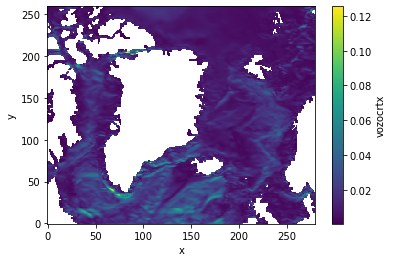

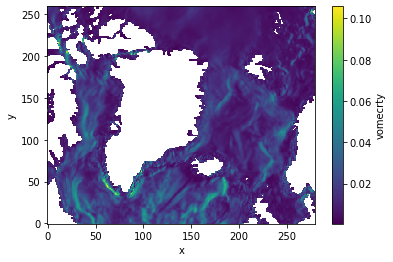

In [136]:
ds_Usurf2plot.std('time_counter').plot() #mean().values
plt.show()
ds_Vsurf2plot.std('time_counter').plot() #mean().values

#### v-component

In [8]:
ds_Vsurf2plotmean = ds_Vsurf2plot.mean('time_counter')
# ds_Vsurf2plotmean_1 = ds_Vsurf2plot.sel(time_counter=slice('1980','2004')).mean('time_counter')
# ds_Vsurf2plotmean_2 = ds_Vsurf2plot.sel(time_counter=slice('2005','2018')).mean('time_counter')
# ds_Vsurf2plotmean_3 = ds_Vsurf2plot.sel(time_counter=slice('1993','2015')).mean('time_counter')

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


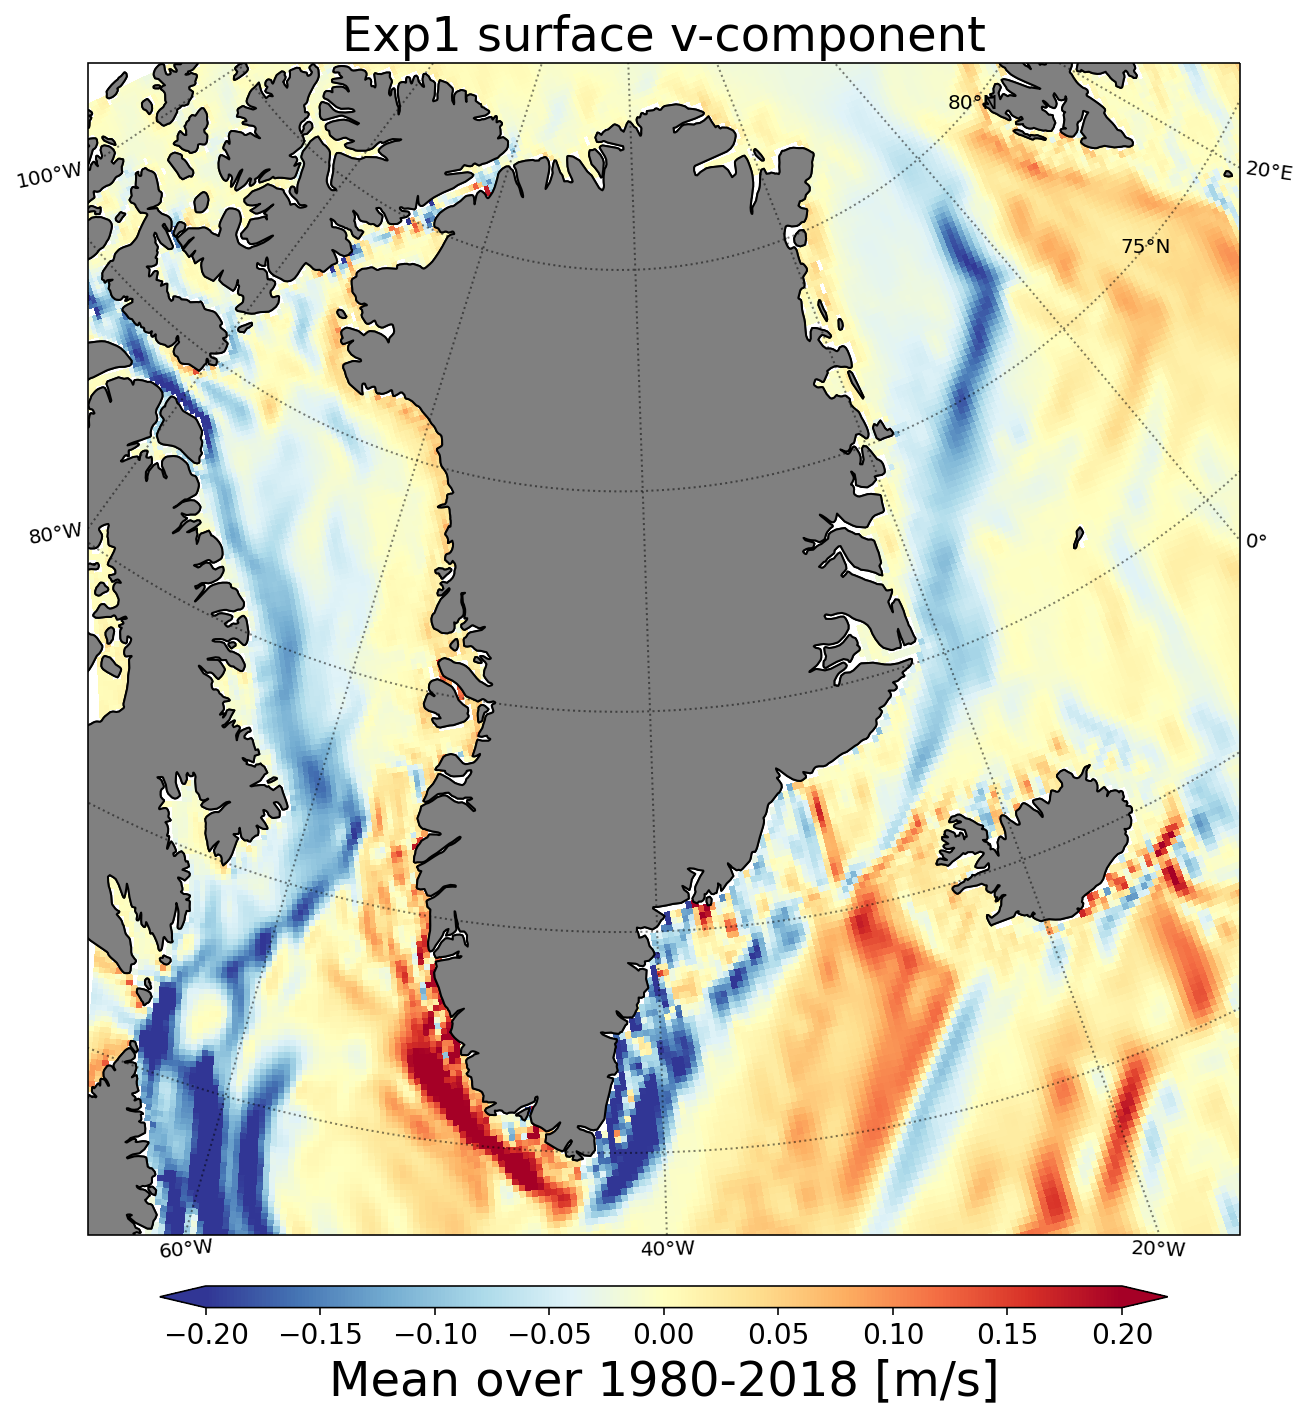

In [9]:
# proj1 = ccrs.PlateCarree()
proj = ccrs.Stereographic(central_latitude=70, central_longitude=-42) 
land  = cfeature.NaturalEarthFeature(name='land',scale='50m', category='physical',facecolor='grey')
# label_style = {'size': 8, 'color': '#BDBDBD', 'weight': 'normal'}

fig, ax_name = plt.subplots(1,1,figsize=(10,15),facecolor='none', dpi=72*2,subplot_kw={'projection': proj})
fig.subplots_adjust(hspace=0, wspace=0, top=0.925, left=0.1)
ax_name.set_extent((-65, -15, 58, 84), crs=ccrs.PlateCarree())
ax_name.coastlines()
gl = ax_name.gridlines(color='k',alpha=0.5, linestyle='--',linewidth=0.33,lw=1,ls=':', draw_labels=True)#, y_inline=True,)
gl.top_labels = False
# gl.xlabel_style = label_style; gl.ylabel_style = label_style
ax_name.add_feature(land, edgecolor='black')

# --------------------------------------
cs= ax_name.pcolormesh(nav_lon, nav_lat, ds_Vsurf2plotmean, shading='flat',cmap =cm.RdYlBu_r, transform=ccrs.PlateCarree(), vmin =-0.2, vmax=0.2)
# cs= ax_name.pcolormesh(nav_lon, nav_lat, ds_Vsurf2plotmean_1, shading='flat',cmap =cm.RdYlBu_r, transform=ccrs.PlateCarree(), vmin =-0.2, vmax=0.2)
# cs= ax_name.pcolormesh(nav_lon, nav_lat, ds_Vsurf2plotmean_2, shading='flat',cmap =cm.RdYlBu_r, transform=ccrs.PlateCarree(), vmin =-0.2, vmax=0.2)
# cs= ax_name.pcolormesh(nav_lon, nav_lat, ds_Vsurf2plotmean_3, shading='flat',cmap =cm.RdYlBu_r, transform=ccrs.PlateCarree(), vmin =-0.2, vmax=0.2)
# ---------------------------------------

cbar_ax = fig.add_axes([0.15, 0.22, 0.7, 0.01])  #(left, bottom, width, height)

cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=14)

# fig.subplots_adjust(bottom=0.18)

# ---------------------------------------
cbar.set_label(r'Mean over 1980-2018 [m/s]', fontsize=24)
# cbar.set_label(r'Mean over 1980-2004 [m/s]', fontsize=24)
# cbar.set_label(r'Mean over 2005-2018 [m/s]', fontsize=24)
# cbar.set_label(r'Mean over 1993-2015 [m/s]', fontsize=24)
# ---------------------------------------


ax_name.set_title("Exp1 surface v-component", fontsize=24) 

# fig.tight_layout(pad=0, h_pad=5, w_pad=0) 

namo ='mean1980-2018_v.png'
# namo ='mean1980-2004_v.png'
# namo ='mean2005-2018_v.png'
# namo ='mean1993-2015_v.png'

fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 


#### u-component

In [10]:
ds_Usurf2plotmean   = ds_Usurf2plot.mean('time_counter')
# ds_Usurf2plotmean_1 = ds_Usurf2plot.sel(time_counter=slice('1980','2004')).mean('time_counter')
# ds_Usurf2plotmean_2 = ds_Usurf2plot.sel(time_counter=slice('2005','2018')).mean('time_counter')
# ds_Usurf2plotmean_3 = ds_Usurf2plot.sel(time_counter=slice('1993','2015')).mean('time_counter')

(array([1.1000e+01, 4.1000e+01, 2.2000e+02, 9.1700e+02, 7.3920e+03,
        3.8158e+04, 2.0070e+03, 3.4900e+02, 9.5000e+01, 7.0000e+00]),
 array([-0.49497476, -0.40127057, -0.3075664 , -0.21386221, -0.12015802,
        -0.02645384,  0.06725035,  0.16095454,  0.25465873,  0.3483629 ,
         0.4420671 ], dtype=float32),
 <BarContainer object of 10 artists>)

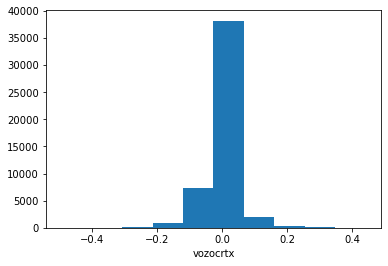

In [131]:
ds_Usurf2plotmean.plot.hist()

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


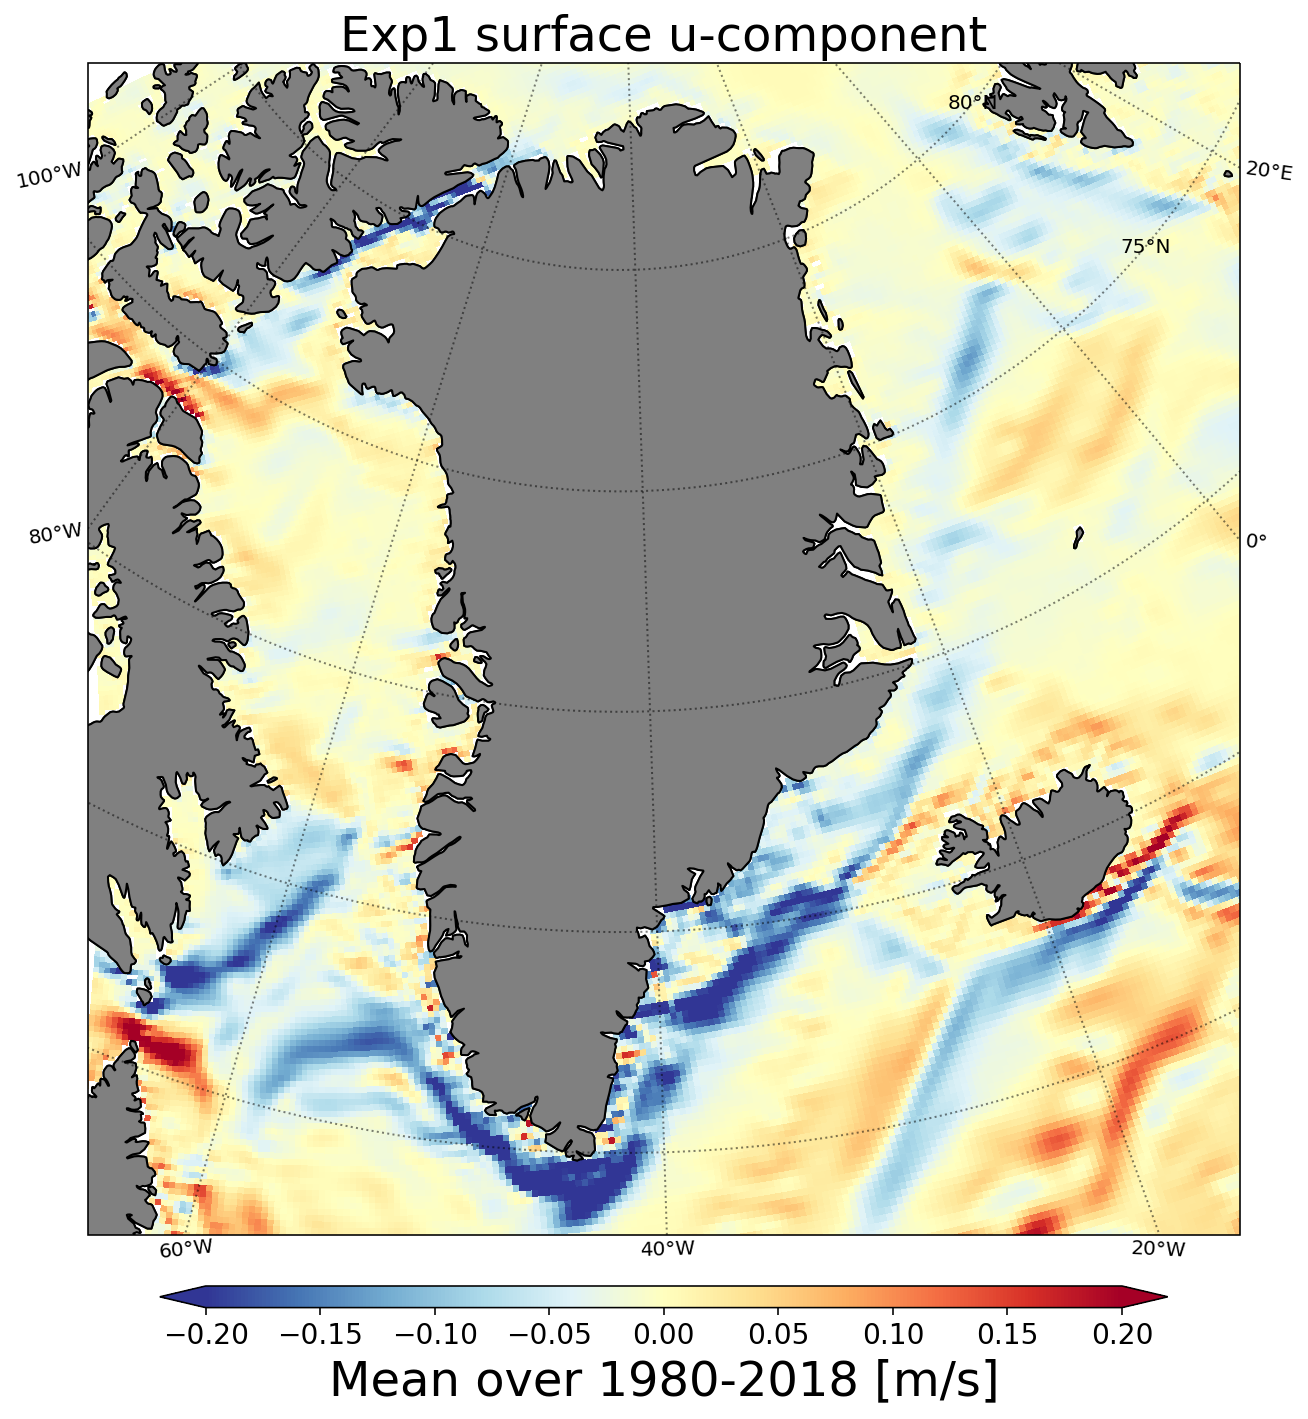

In [11]:
# proj1 = ccrs.PlateCarree()
proj = ccrs.Stereographic(central_latitude=70, central_longitude=-42) 
land  = cfeature.NaturalEarthFeature(name='land',scale='50m', category='physical',facecolor='grey')
# label_style = {'size': 8, 'color': '#BDBDBD', 'weight': 'normal'}

fig, ax_name = plt.subplots(1,1,figsize=(10,15),facecolor='none', dpi=72*2,subplot_kw={'projection': proj})
fig.subplots_adjust(hspace=0, wspace=0, top=0.925, left=0.1)
ax_name.set_extent((-65, -15, 58, 84), crs=ccrs.PlateCarree())
ax_name.coastlines()
gl = ax_name.gridlines(color='k',alpha=0.5, linestyle='--',linewidth=0.33,lw=1,ls=':', draw_labels=True)#, y_inline=True,)
gl.top_labels = False
# gl.xlabel_style = label_style; gl.ylabel_style = label_style
ax_name.add_feature(land, edgecolor='black')

# --------------------------------------
cs= ax_name.pcolormesh(nav_lon, nav_lat, ds_Usurf2plotmean, shading='flat',cmap =cm.RdYlBu_r, transform=ccrs.PlateCarree(), vmin =-0.2, vmax=0.2)
# cs= ax_name.pcolormesh(nav_lon, nav_lat, ds_Usurf2plotmean_1, shading='flat',cmap =cm.RdYlBu_r, transform=ccrs.PlateCarree(), vmin =-0.2, vmax=0.2)
# cs= ax_name.pcolormesh(nav_lon, nav_lat, ds_Usurf2plotmean_2, shading='flat',cmap =cm.RdYlBu_r, transform=ccrs.PlateCarree(), vmin =-0.2, vmax=0.2)
# cs= ax_name.pcolormesh(nav_lon, nav_lat, ds_Usurf2plotmean_3, shading='flat',cmap =cm.RdYlBu_r, transform=ccrs.PlateCarree(), vmin =-0.2, vmax=0.2)
# ---------------------------------------

cbar_ax = fig.add_axes([0.15, 0.22, 0.7, 0.01])  #(left, bottom, width, height)

cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', extend='both')
cbar.ax.tick_params(labelsize=14)

# fig.subplots_adjust(bottom=0.18)

# ---------------------------------------
cbar.set_label(r'Mean over 1980-2018 [m/s]', fontsize=24)
# cbar.set_label(r'Mean over 1980-2004 [m/s]', fontsize=24)
# cbar.set_label(r'Mean over 2005-2018 [m/s]', fontsize=24)
# cbar.set_label(r'Mean over 1993-2015 [m/s]', fontsize=24)
# ---------------------------------------


ax_name.set_title("Exp1 surface u-component", fontsize=24) 

# fig.tight_layout(pad=0, h_pad=5, w_pad=0) 

namo ='mean1980-2018_u.png'
# namo ='mean1980-2004_u.png'
# namo ='mean2005-2018_u.png'
# namo ='mean1993-2015_u.png'

fig.savefig(diro+namo, facecolor=fig.get_facecolor(), bbox_inches='tight') #,edgecolor='none', 
